In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Iris dataset
print("1. Loading the Iris dataset...")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("\nDataset loaded successfully. Here's a quick look at the first 5 rows:")
print(X.head())
print("\nTarget variable (species):")
print(y.head())

1. Loading the Iris dataset...

Dataset loaded successfully. Here's a quick look at the first 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target variable (species):
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [4]:
# 2. Exploratory Data Analysis (EDA)
print("\n2. Performing Exploratory Data Analysis (EDA)...")
print("\n--- Dataset Information ---")
print(X.info())
print("\n--- Descriptive Statistics ---")
print(X.describe())


2. Performing Exploratory Data Analysis (EDA)...

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

--- Descriptive Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000 

In [5]:
# 3. Data Preprocessing: Scaling the features
print("\n3. Scaling the features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled features (first 5 rows):")
print(X_scaled.head())


3. Scaling the features...

Scaled features (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [6]:
# 4. Splitting the data into training and testing sets
print("\n4. Splitting the data...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


4. Splitting the data...
Training set size: 120 samples
Testing set size: 30 samples


In [7]:
# 5. Model Training: K-Nearest Neighbors
print("\n5. Training the KNN model...")
k = 5 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


5. Training the KNN model...


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
# 6. Model Evaluation
print("\n6. Evaluating the model...")
y_pred = knn.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


6. Evaluating the model...

Model Accuracy: 0.93



--- Confusion Matrix ---


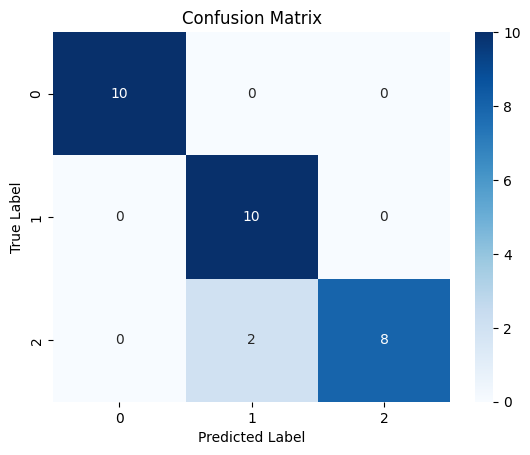

In [9]:
# Print Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# Print Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n🎉 The process is complete!")


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


🎉 The process is complete!
